In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', delimiter='\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=4622, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,4622.0,927.254868,528.890796,1.0,477.25,926.0,1393.0,1834.0
quantity,4622.0,1.075725,0.410186,1.0,1.00,1.0,1.0,15.0


In [9]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [21]:
df['item_price'] = df.item_price.apply(lambda s: np.float64(s[1:]))

In [22]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.6+ KB


In [25]:
grp = df.groupby(['order_id'])['item_price'].agg(['sum'])
grp.head()

,sum
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70


In [26]:
grp.columns

Index(['sum'], dtype='object')

In [27]:
grp.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834],
           dtype='int64', name='order_id', length=1834)

In [28]:
type(grp)

pandas.core.frame.DataFrame

In [29]:
grp.columns = ['total_price']

In [30]:
grp.head()

,total_price
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bca7278>]],
      dtype=object)

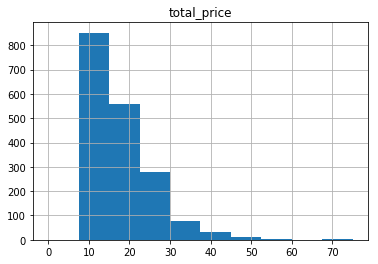

In [35]:
grp.hist(range=(0,75))

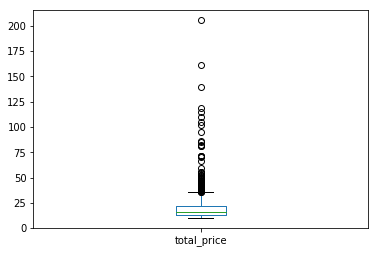

In [36]:
grp.plot(kind='box')

In [37]:
grp.total_price.mean()

18.811428571428568

In [38]:
grp.total_price.std()

11.652511696471787